# RIT DSCI-633: Foundations of Data Science and Analytics
## Assignment 1
### Due: 11:59 pm EST, Saturday, Oct 2, 2021

### Problem 1 (10 points)

In statistics and probability theory, the law of large numbers is a theorem that describes the result of
repeating the same experiment a large number of times. The theorem states that if the same
experiment or study is repeated independently a large number of times, the average of the results of
the trials must be close to the expected value. The result becomes closer to the expected value as the
number of trials is increased. Let us look at a specific experiment.

Assume you have a Gaussian distribution (commonly called a “bell curve”) with mean µ and std
deviation σ. The area under the curve that lies between σ and 2σ, and –σ and -2σ is approximately
27.2%. In other words, approximately 27.2% of numbers generated randomly using this distribution will
fall in the range [µ + σ, µ + 2σ] or [µ - 2σ, µ - σ], as shown below.

Generate N random numbers that follow a Gaussian distribution with µ = 100, σ = 10, and count the
numbers M that fall into the ranges above. Print the fraction M/N. Repeat this for N = 10, 100, 1000,
10000, and 1000000.

Does the fraction start to approach 27.2%?


### Solution

In [1]:
import numpy as np
mean = 100; deviation = 10
def count_(N):
    my_arr = np.random.randn(N) *deviation + mean
    count = 0
    min = mean+deviation
    max = mean+(2*deviation)
    min1 = mean - 2*deviation
    max1 = mean - deviation
    for item in my_arr:
           if(item>= min and item<=max) or (item>= min1 and item<=max1):
                count+=1

    range = (count/N)*100
    print(range)

count_(10)
count_(100)
count_(10000)
count_(1000000)

# yes the fraction starts to approach 27.2 percent as we increase the value of N

50.0
31.0
27.47
27.1778


<font color = 'green'> Correct : 10 points </font> 
Remember not to use variables like "min" and "max" next time. They are already in Python. So here, it didnt cause problems, however, they might be an issue in other codes. 

### Problem 2 (5 points)

Imagine you have a dataset of movie ratings for a set of 500 popular movies and a set of 1000 users.
Each data sample contains the ratings of each movie (from 1 to 5 stars) by a specific user. The rating is
an integer in the range [0,5], with a value of 0 means that the user did not watch that movie.
How would you convert this data to a form suitable for association analysis? In particular, what type of
attributes would you have and how many of them?



### Solution

- Let's assume a datatable containing number of columns as a number of movies(500) and number of rows as a number of users(1000)
- Movie ratings will be added in each cell. 
- This is show us the association analysis between movies and user. If most of the users give the highest/same rating to movie-1 and movie-2 that shows us that if user likes movie-1 that the possibility of liking movie-2 for that user will increase.

- Attribute of the movies can be as follows:
    - Rating
    - Genre
    - Cast and crew
    - Language
    - Production house

<font color = 'red'> Incorrect : 0 points </font> 
Reasoning : 
For association analysis, we require binary asymmetric attributes.

Since each rating can take 6 possible values, we would need to replace it with 6 asymmetric binary attributes
of the form (rating == 0?) (rating == 1?) ...

This will give us 500 x 6 = **3000 binary attributes per user**.  
The resulting sparse data matrix would be **1000 rows x 3000 columns**.

### Problem 3 (5 points)

Distinguish between noise and outliers

1. True or False ? Noise may be in the form of noisy attribute values, or noise objects.
2. True or False ? Noise is sometimes desirable.
3. True or False ? Outliers are sometimes desirable.
4. True or False ? Noise objects may or may not be outliers. Explain your reasoning.
5. True or False ? Outlier objects may or may not be noise. Explain your reasoning.

### Solution

1. True

2. False

3. True

4. True - Noise in attribute values can make the data look more randomized or unusual. Thus, it is possible
that some instances in noisy data will appear as outliers

5. False - Outliers can be legitimate data objects that appear to not belong in the data set. Those outliers
would typically not classify as noise objects.


<font color = 'blue'> Partially Correct : 4.5 points </font> 
Reasoning : 
The part 5 should be true given your reasoning. The reasoning you have given is correct, which means that outliers may or may not be noise. (Doesnt mean that always outliers are not noise - sometimes they can be noise right - as in part 4)
Outliers can come about because of genuine reasons - for example, swiping your credit card while on vacation. These are not noise and may in fact, be very important for the data analysis problem. Noise, on the other hands, is always undesirable.

### Problem 4 (20 points)
Download the ‘Diamonds’ dataset from https://www.kaggle.com/shivam2503/diamonds.
1. Based on the description of the dataset provided at the site, categorize each attribute of the data as
discrete or continuous, qualitative (nominal or ordinal), or quantitative (interval or ratio)  (5 points)
e.g. Age in years: Discrete, Quantitative, Ratio.
2. Load the CSV data file into a Pandas DataFrame object and display the first 5 rows. (2 points)
3. Calculate summary statistics:
a. For each quantitative attribute: find the mean, median, standard deviation, and range. (3.5 points)
b. For each qualitative attribute, find the mode. (1.5 points)
c. Find the Interquartile Range (IQR) of the ‘price’ variable. (0.5 points)
4. What fraction of the data samples have ‘cut’ that is ‘very good’ or better ? Create a bar plot
showing the distribution of the data samples by ‘cut’ (one bar for each value of cut). (2.5 points)
5. Plot a histogram of the 'carat' variable. (2 points)
6. Plot a scatter plot of ‘carat’ vs ‘price’. (2 points)
7. Compute the correlation between ‘carat’ and ‘price’. (1 point)

### Solution

#### Solution 4.1

1. carat - continuous, quantitative, Ratio
2. cut - discrete, qualitative, ordinal
3. color - discrete, qualitative, ordinal
4. clarity - discrete, qualitative, ordinal
5. depth - continuous, quantitative, ratio
6. table - continuous, quantitative, ratio
7. price - continuous, quantitative, ratio
8. x - continuous, quantitative, ratio
9. y - continuous, quantitative, ratio
10. z - continuous, quantitative, ratio

<font color = 'green'> Correct : 5 points </font> 

#### Solution 4.2

In [6]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

my_df = pd.read_csv (r'diamonds.csv')
print (my_df.head(5))
length = my_df.count()[0]

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


<font color = 'green'> Correct : 2 points </font> 

#### Solution 4.3

In [7]:
length = my_df.count()[0]
def carat_stats():
    carat = 0
    for item in my_df['carat']:
        carat+=item
    mean = carat/length
    print("\nMean of carat is:")
    print(mean)

    sorted_carat = list(my_df['carat'])
    sorted_carat.sort()

    if ( length%2 == 0):
        carat = (sorted_carat[int(length/2)] +  sorted_carat[int(length/2)+1])/2
    else:
        carat = sorted_carat['carat'][length/2]
    print("\nMedian of carat is:")
    print(carat)

    carat = 0
    for item in my_df['carat']:
        carat+= ((item - mean) * (item-mean))
    std_dev = math.sqrt(carat/length)
    print("\nStandard Deviation of carat is:")
    print(std_dev)

    range = sorted_carat[length-1] - sorted_carat[0]
    print("\nRange of carat is:")
    print(range)

def depth_stats():
    depth = 0
    for item in my_df['depth']:
        depth+=item
    mean = depth/length
    print("\nMean of depth is:")
    print(mean)

    sorted_depth = list(my_df['depth'])
    sorted_depth.sort()

    if ( length%2 == 0):
        depth = (sorted_depth[int(length/2)] +  sorted_depth[int(length/2)+1])/2
    else:
        depth = sorted_depth['depth'][length/2]
    print("\nMedian of depth is:")
    print(depth)

    depth = 0
    for item in my_df['depth']:
        depth+= ((item - mean) * (item-mean))
    std_dev = math.sqrt(depth/length)
    print("\nStandard Deviation of depth is:")
    print(std_dev)

    range = sorted_depth[length-1] - sorted_depth[0]
    print("\nRange of depth is:")
    print(range)

def table_stats():
    table = 0
    for item in my_df['table']:
        table+=item
    mean = table/length
    print("\nMean of table is:")
    print(mean)

    sorted_table = list(my_df['table'])
    sorted_table.sort()

    if ( length%2 == 0):
        table = (sorted_table[int(length/2)] +  sorted_table[int(length/2)+1])/2
    else:
        table = sorted_table['table'][length/2]
    print("\nMedian of table is:")
    print(table)

    table = 0
    for item in my_df['table']:
        table+= ((item - mean) * (item-mean))
    std_dev = math.sqrt(table/length)
    print("\nStandard Deviation of table is:")
    print(std_dev)

    range = sorted_table[length-1] - sorted_table[0]
    print("\nRange of table is:")
    print(range)
    
def price_stats():
    price = 0
    for item in my_df['price']:
        price+=item
    mean = price/length
    print("\nMean of price is:")
    print(mean)

    sorted_price = list(my_df['price'])
    sorted_price.sort()

    if ( length%2 == 0):
        price = (sorted_price[int(length/2)] +  sorted_price[int(length/2)+1])/2
    else:
        price = sorted_price['price'][length/2]
    print("\nMedian of price is:")
    print(price)

    price = 0
    for item in my_df['price']:
        price+= ((item - mean) * (item-mean))
    std_dev = math.sqrt(price/length)
    print("\nStandard Deviation of price is:")
    print(std_dev)

    range = sorted_price[length-1] - sorted_price[0]
    print("\nRange of price is:")
    print(range)

def x_stats():
    x = 0
    for item in my_df['x']:
        x+=item
    mean = x/length
    print("\nMean of x is:")
    print(mean)

    sorted_x = list(my_df['x'])
    sorted_x.sort()

    if ( length%2 == 0):
        x = (sorted_x[int(length/2)] +  sorted_x[int(length/2)+1])/2
    else:
        x = sorted_x['x'][length/2]
    print("\nMedian of x is:")
    print(x)

    x = 0
    for item in my_df['x']:
        x+= ((item - mean) * (item-mean))
    std_dev = math.sqrt(x/length)
    print("\nStandard Deviation of x is:")
    print(std_dev)

    range = sorted_x[length-1] - sorted_x[0]
    print("\nRange of x is:")
    print(range)

def y_stats():
    y = 0
    for item in my_df['y']:
        y+=item
    mean = y/length
    print("\nMean of y is:")
    print(mean)

    sorted_y = list(my_df['y'])
    sorted_y.sort()

    if ( length%2 == 0):
        y = (sorted_y[int(length/2)] +  sorted_y[int(length/2)+1])/2
    else:
        price = sorted_y['y'][length/2]
    print("\nMedian of y is:")
    print(y)

    y = 0
    for item in my_df['y']:
        y+= ((item - mean) * (item-mean))
    std_dev = math.sqrt(y/length)
    print("\nStandard Deviation of y is:")
    print(std_dev)

    range = sorted_y[length-1] - sorted_y[0]
    print("\nRange of y is:")
    print(range)

def z_stats():
    z = 0
    for item in my_df['z']:
        z+=item
    mean = z/length
    print("\nMean of z is:")
    print(mean)

    sorted_z = list(my_df['z'])
    sorted_z.sort()

    if ( length%2 == 0):
        z = (sorted_z[int(length/2)] +  sorted_z[int(length/2)+1])/2
    else:
        price = sorted_z['z'][length/2]
    print("\nMedian of z is:")
    print(z)

    z = 0
    for item in my_df['z']:
        z+= ((item - mean) * (item-mean))
    std_dev = math.sqrt(z/length)
    print("\nStandard Deviation of z is:")
    print(std_dev)

    range = sorted_z[length-1] - sorted_z[0]
    print("\nRange of z is:")
    print(range)

def cut_mode():
    mode = my_df['cut'].value_counts().sort_values(ascending=False).index[0]
    print("mode of the cut is: ")
    print(mode)

def color_mode():
    mode = my_df['color'].value_counts().sort_values(ascending=False).index[0]
    print("mode of the color is: ")
    print(mode)

def clarity_mode():
    mode = my_df['clarity'].value_counts().sort_values(ascending=False).index[0]
    print("mode of the clarity is: ")
    print(mode)

def price_IQR():
    price = list(my_df['price'])
    price.sort()
    q1 = price[:(int(length/2) -1)]
    q2 = price[int(length/2):]
    q1_length = len(q1)
    q2_length = len(q2)
    q1_median =int((q1[int(q1_length/2)] +  q1[int(q1_length/2)+1])/2) if q1_length%2 == 0 else q1[int(q1_length/2)]
    q2_median = int((q2[int(q2_length/2)] +  q2[int(q2_length/2)+1])/2) if q2_length%2 == 0 else q2[int(q2_length/2)]
    IQR = q2_median - q1_median
    print("\nInterquatile range of Price is:")
    print(IQR)

carat_stats()
depth_stats()
table_stats()
price_stats()
x_stats()
y_stats()
z_stats()
cut_mode()
color_mode()
clarity_mode()
price_IQR()


Mean of carat is:
0.7979397478679852

Median of carat is:
0.7

Standard Deviation of carat is:
0.47400685050992863

Range of carat is:
4.81

Mean of depth is:
61.74940489432624

Median of depth is:
61.8

Standard Deviation of depth is:
1.4326080390047153

Range of depth is:
36.0

Mean of table is:
57.45718390804603

Median of table is:
57.0

Standard Deviation of table is:
2.2344698499833475

Range of table is:
52.0

Mean of price is:
3932.799721913237

Median of price is:
2401.0

Standard Deviation of price is:
3989.402757628797

Range of price is:
18497

Mean of x is:
5.731157211716609

Median of x is:
5.7

Standard Deviation of x is:
1.1217503485170812

Range of x is:
10.74

Mean of y is:
5.734525954764462

Median of y is:
5.71

Standard Deviation of y is:
1.1421240869899865

Range of y is:
58.9

Mean of z is:
3.5387337782723316

Median of z is:
3.53

Standard Deviation of z is:
0.7056923054027426

Range of z is:
31.8
mode of the cut is: 
Ideal
mode of the color is: 
G
mode of the 

<font color = 'green'> Correct : 5.5 points </font> 

#### Solution 4.4

Fraction of Cut is
0.8791991101223582


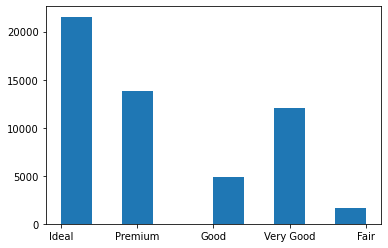

In [4]:
quality = ["Very Good", "Premium","Ideal"]
cut = list(my_df["cut"])
fraction = 0
for item in quality:
    fraction += cut.count(item)
print("Fraction of Cut is")
print(fraction/length)

y = np.array(my_df["cut"])
plt.hist(y)
plt.show()

<font color = 'green'> Correct : 2.5 points </font> 

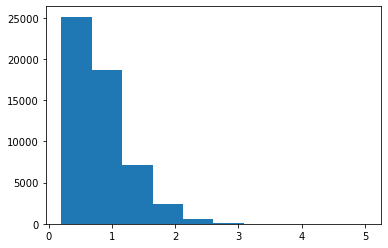

In [5]:
# Solution 4.5

y = np.array(my_df["carat"])
plt.hist(y)
plt.show()

<font color = 'green'> Correct : 2 points </font> 

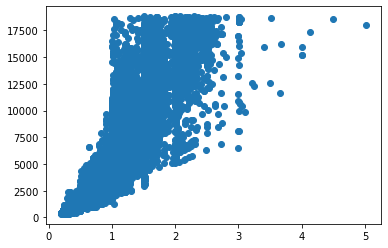

In [6]:
# Solution 4.6

carat = np.array(my_df['carat'])
price = np.array(my_df['price'])

plt.scatter(carat, price)
plt.show()

<font color = 'green'> Correct : 2 points </font> 

In [7]:
# Solution 4.7

def intersections(a,b):
    v = np.corrcoef(a,b)
    return v

corr_ab = intersections(my_df['price'],my_df['carat'])
corr_ab[0,1]

0.9215913011934779

<font color = 'green'> Correct :1 points </font> 

### Problem 5 (4 points)

We have a collection of m documents.

Let us say we would like to compare two documents x and y using their document term vectors. 

Let tf_ij be the frequency of the ith word (term) in the jth document

1. Let the vocabulary size (the dimensionality of the vectors) be n. What is a good measure of similarity for this purpose ? Write the formula for it in terms of tf_ij.

2. Consider the variable transformation given by idf_ij = tf_ij * log(m/df_i), where df_i is the document frequency, i.e. the number of documents in which the ith term occurs. The transformed variable idf_ij is called the inverse document frequency. What are the advantages of using this transformed variable instead of the original in the similarity computation ?

### Solution

#### Solution 5.1

# (Σ(tf_ix*tf_iy))/(Σ(((tf_ix)^2)^(0.5))*Σ(((tf_iy)^2)^(0.5))

#- We will be using cosine similarity

<font color = 'green'> Correct : 2 points </font> 

#### Solution 5.2

- IDF can be computed easily
- There will be always some basic matric that can be useful to extract the frequently occurred term in any document
- Similarities between any 2 documents can be easily computed

<font color = 'green'> Correct : 2 points </font> 

### Problem 6 (6 points)

Write Python functions to compute the Hamming (L1) distance, SMC and Jaccard similarity coefficient between two binary vectors. Use them to these proximity measures between the following vectors:

x = 1010101010101 

y = 1000100010001

### Solution

In [9]:

x = "1010101010101" 

y = "1000100010001"

list_x = list(x)
list_y = list(y)
count = 0
for i in range(len(list_x)):
    if list_x[i]!=list_y[i]:
        count+=1
print("Hamming distance is:")
print(count)


f00 = 0
f01=0
f10=0
f11 = 0

for i in range(len(list_x)):
    if list_x[i] == '0' and list_y[i] == '0':
        f00+=1
    elif list_x[i] == '0' and list_y[i] == '1':
        f01+=1
    elif list_x[i] == '1' and list_y[i] == '0':
        f10+=1
    elif list_x[i] == '1' and list_y[i] == '1':
        f11+=1

SMC = (f11 + f00) / (f01 + f10 + f11 + f00)
print("\nSMC is:")
print(SMC)

J =  (f11) / (f01 + f10 + f11)
print("\nJaccard similarity coefficient:")
print(J)


Hamming distance is:
3

SMC is:
0.7692307692307693

Jaccard similarity coefficient:
0.5714285714285714


<font color = 'green'> Correct : 6 points </font> 

### Problem 7 (6 points)

Calculate the indicated similarity or distance measures of the vectors show below (you can do this by hand or by writing code, but please show the computation either way):

x = (1,1,1,1) and y = (3,3,3,3) : cosine, correlation, Euclidean

x = (0,1,0,1,0,1) and y = (1,0,1,0,1,0) : cosine, correlation, Euclidean, Jaccard 

x = (1,1,0,1,0,1) and y = (1,1,1,0,0,1) : cosine, correlation, Lmax, Jaccard

### Solution

In [10]:
def cosine():
    inner_prod = 0
    len_v_x = 0
    len_v_y = 0
    for i in range(len(x)):
        inner_prod += x[i]+y[i]
        len_v_x += x[i]*x[i]
        len_v_y += y[i]*y[i]
        
    len_v_x = math.sqrt(len_v_x)
    len_v_y = math.sqrt(len_v_y)
    print("cosine similarity:")
    print(inner_prod/(len_v_x * len_v_y))

    
def corelation():
    sum_x = 0
    for item in x:
        sum_x +=item
    mean_x = sum_x/len(x)
    
    sum_y = 0
    for item in y:
        sum_y +=item
    mean_y = sum_y/len(y)
    
    sum_xy = 0
    for item in range(len(x)):
         sum_xy += (x[item] - mean_x) * (y[item] - mean_y)
    
    variance = sum_xy/(len(x) - 1)
    sum_x = 0
    for item in x:
        sum_x+= ((item - mean_x) * (item-mean_x))
    std_dev_x = math.sqrt(sum_x/len(x))
    
    sum_y = 0
    for item in y:
        sum_y+= ((item - mean_y) * (item-mean_y))
    std_dev_y = math.sqrt(sum_y/len(y))
    print("\nCorelation")
    if ((std_dev_x * std_dev_y)) == 0:
        print("Not defined")
    else:
        print(variance/(std_dev_x * std_dev_y))
    
def euclidean():
    sum = 0
    for item in range(len(x)):
            sum += (x[item] - y[item])* (x[item] - y[item])
    print("\n Euclidean is:")
    print(math.sqrt(sum))

def jaccard():
    
    f00 = 0
    f01=0
    f10=0
    f11 = 0

    for i in range(len(x)):
        if x[i] == 0 and y[i] == 0:
            f00+=1
        elif x[i] == 0 and y[i] == 1:
            f01+=1
        elif x[i] == 1 and y[i] == 0:
            f10+=1
        elif x[i] == 1 and y[i] == 1:
            f11+=1
    J =  (f11) / (f01 + f10 + f11)
    print("\nJaccard similarity coefficient")
    print(J)

def lmax():
    max = 0
    for item in range(len(x)):
            if(max<abs( x[item] - y[item])):
                max = abs( x[item] - y[item])
    print("\nLmax is:")
    print(max)

x = [1,1,1,1] 
y = [3,3,3,3]
cosine()
corelation()
euclidean()


x = [0,1,0,1,0,1] 
y = [1,0,1,0,1,0]
cosine()
corelation()
euclidean()
jaccard()

x = [1,1,0,1,0,1] 
y = [1,1,1,0,0,1]
cosine()
corelation()
lmax()
jaccard()

cosine similarity:
1.3333333333333333

Corelation
Not defined

 Euclidean is:
4.0
cosine similarity:
2.0000000000000004

Corelation
-1.2

 Euclidean is:
2.449489742783178

Jaccard similarity coefficient
0.0
cosine similarity:
2.0

Corelation
0.3000000000000001

Lmax is:
1

Jaccard similarity coefficient
0.6


<font color = 'blue'> Partially correct : 4 points </font> 

### Submission instructions

1. Your assignment should be completed by filling in the empty solution cells in this Jupyter notebook file (.ipynb). Feel free to add more cells as needed.

2. Please comment your code using either markdown or #comments and use meaningful variable names to make it as readable and intelligible as possible.

3. Write your code in the form of functions. For example: 

    def my_code ():

          #Write code here
      
          return "The return value"
          

4. If the problem is to find the value of 'x', printing 'x = (your answer)' will help us identify if your code worked.


5. For code that refers to local data files downloaded from the internet, please keep the file path simple (e.g. ~/downloads/datafilename) so that it works on our copy of the dataset. Please do not modify either the filename or the file contents in any way.

6. Solution to problems that do not require any coding can be typed up in their own cells using markdown.
    
7. Unless there are legitimate circumstances, late assignments will not be accepted.

8. All assignments are individual.

9. All the sources used for problem solution must be acknowledged, e.g. web sites, books, research papers, etc.

10. Academic integrity is taken seriously; for detailed information see the RIT Honor Code and with RIT's Academic Integrity Policy.

<font color='green'> Total points : 48.5 points </font>